### Pandas를 활용한 서울시 CCTV현황 분석 및 인구현황 분석

In [60]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [61]:
CCTV_Seoul = pd.read_excel("../Data/CCTV_in_Seoul_2018.xlsx")
CCTV_Seoul

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530
8,노원구,1906,481.0,117.0,203.0,80,461,298,110,156
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71


In [62]:
# 기관명을 구별로 변경하기
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구별'},inplace=True)
CCTV_Seoul

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530
8,노원구,1906,481.0,117.0,203.0,80,461,298,110,156
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71


In [63]:
# NaN 데이터 확인 후 NaN이 있으면 NaN을 처리하기
for i in range(2,len(CCTV_Seoul.columns)):
    nanCount = len(CCTV_Seoul.iloc[:,i][CCTV_Seoul.iloc[:,i].isnull()])
    print(CCTV_Seoul.columns[i],":%5d"%(nanCount))

2011년 이전 :    2
2012년 :    2
2013년 :    2
2014년 :    0
2015년 :    0
2016년 :    0
2017년 :    0
2018년 :    0


In [64]:
# NaN을 0으로 변환하기
CCTV_Seoul = CCTV_Seoul.fillna(0)
CCTV_Seoul

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530
8,노원구,1906,481.0,117.0,203.0,80,461,298,110,156
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71


---
### 인구현황

In [65]:
pop_Seoul = pd.read_excel('../Data/population_in_Seoul_2020.xlsx',
header=3,
usecols="B,D,G,J,N" # 자치구, 계, 한국인, 외국인, 65세
)
pop_Seoul

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989
6,동대문구,362793,346156,16637,60367
7,중랑구,400678,395619,5059,66764
8,성북구,454532,442494,12038,72172
9,강북구,316750,312985,3765,61660


In [66]:
pop_Seoul.columns = ['구별','인구수','한국인','외국인','고령자']
pop_Seoul

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989
6,동대문구,362793,346156,16637,60367
7,중랑구,400678,395619,5059,66764
8,성북구,454532,442494,12038,72172
9,강북구,316750,312985,3765,61660


In [67]:
pop_Seoul.drop(index=0,inplace=True)
pop_Seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989
6,동대문구,362793,346156,16637,60367
7,중랑구,400678,395619,5059,66764
8,성북구,454532,442494,12038,72172
9,강북구,316750,312985,3765,61660
10,도봉구,333495,331238,2257,60023


In [68]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,516662,499374,17288,76664
22,서초구,434801,430568,4233,58332
23,강남구,549898,544804,5094,72602
24,송파구,680883,674095,6788,89539
25,강동구,457042,452646,4396,66401


---
### CCTV 현황

In [69]:
CCTV_Seoul
# 소계 기준으로 정렬
CCTV_Seoul.sort_values(by='소계',ascending=False,inplace=True)
CCTV_Seoul

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
14,서초구,2835,1172.0,91.0,228.0,134,215,352,247,396
18,양천구,2775,772.0,161.0,185.0,169,172,349,137,830
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793
13,서대문구,2121,565.0,233.0,214.0,114,109,277,415,194


### 3년간 CCTV증가율을 구해서 CCTV가 제일 많이 증가한 구를 표시
- 과거 대비 (~2015년) 최근 (2016~2018) 증가율
- 보통 최근 5년단위로 계산함

In [70]:
CCTV_Seoul['최근증가율'] = \
    (CCTV_Seoul.iloc[:,7:10].sum(axis=1)/(CCTV_Seoul.iloc[:,2:7].sum(axis=1))) * 100
CCTV_Seoul.sort_values(by='최근증가율',ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295


---
# 인구현황

In [71]:
pop_Seoul.sort_values(by='인구수',ascending=False)

,구별,인구수,한국인,외국인,고령자
24,송파구,680883,674095,6788,89539
16,강서구,595703,589302,6401,85992
23,강남구,549898,544804,5094,72602
11,노원구,535495,531037,4458,82682
21,관악구,516662,499374,17288,76664
12,은평구,482509,478019,4490,82245
15,양천구,460532,456339,4193,62761
25,강동구,457042,452646,4396,66401
8,성북구,454532,442494,12038,72172
17,구로구,438308,405837,32471,67432


In [72]:
# 구별 항목 파악
len(pop_Seoul['구별'].unique())

25

In [73]:
# 고령자, 외국인 비율을 계산 후 적용
pop_Seoul['외국인비율'] = pop_Seoul.외국인 / pop_Seoul.인구수 * 100
pop_Seoul['고령자비율'] = pop_Seoul.고령자 / pop_Seoul.인구수 * 100

In [74]:
pop_Seoul

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462
3,용산구,246165,229579,16586,39439,6.737757,16.021368
4,성동구,307193,299042,8151,44728,2.653381,14.560228
5,광진구,365990,350417,15573,48989,4.255034,13.385338
6,동대문구,362793,346156,16637,60367,4.585811,16.639516
7,중랑구,400678,395619,5059,66764,1.262610,16.662757
8,성북구,454532,442494,12038,72172,2.648438,15.878310
9,강북구,316750,312985,3765,61660,1.188635,19.466456
10,도봉구,333495,331238,2257,60023,0.676772,17.998171


In [75]:
# 인구 비율
pop_Seoul.sort_values(by='인구수',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
23,강남구,549898,544804,5094,72602,0.926354,13.202812
11,노원구,535495,531037,4458,82682,0.832501,15.440294
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [76]:
# 외국인수가 제일 많은 지역
pop_Seoul.sort_values(by='외국인',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
17,구로구,438308,405837,32471,67432,7.408261,15.384615
18,금천구,251370,232583,18787,38508,7.473843,15.319251
21,관악구,516662,499374,17288,76664,3.346095,14.838328
6,동대문구,362793,346156,16637,60367,4.585811,16.639516


In [77]:
# 외국인 비율이 제일 높은 지역
pop_Seoul.sort_values(by='외국인비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
2,중구,136469,126175,10294,23794,7.543105,17.435462
18,금천구,251370,232583,18787,38508,7.473843,15.319251
17,구로구,438308,405837,32471,67432,7.408261,15.384615
3,용산구,246165,229579,16586,39439,6.737757,16.021368


In [78]:
# 고령자가 제일 많은 지역
pop_Seoul.sort_values(by='고령자',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
11,노원구,535495,531037,4458,82682,0.832501,15.440294
12,은평구,482509,478019,4490,82245,0.930553,17.045278
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [79]:
# 고령자 비율이 제일 높은 지역
pop_Seoul.sort_values(by='고령자비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,316750,312985,3765,61660,1.188635,19.466456
10,도봉구,333495,331238,2257,60023,0.676772,17.998171
2,중구,136469,126175,10294,23794,7.543105,17.435462
1,종로구,161984,151217,10767,28073,6.646953,17.330724
12,은평구,482509,478019,4490,82245,0.930553,17.045278


---
### CCTV 데이터와 인구 현황 데이터 합치기

In [80]:
data_result = pd.merge(CCTV_Seoul,pop_Seoul,on='구별')
data_result


,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425,516662,499374,17288,76664,3.346095,14.838328
2,구로구,3227,852.0,219.0,349.0,187,268,326,540,486,72.106667,438308,405837,32471,67432,7.408261,15.384615
3,성북구,3003,779.0,84.0,304.0,241,279,388,285,643,78.008299,454532,442494,12038,72172,2.648438,15.878310
4,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367,43.091787,482509,478019,4490,82245,0.930553,17.045278
5,서초구,2835,1172.0,91.0,228.0,134,215,352,247,396,54.076087,434801,430568,4233,58332,0.973549,13.415793
6,양천구,2775,772.0,161.0,185.0,169,172,349,137,830,90.198766,460532,456339,4193,62761,0.910469,13.627935
7,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681,307193,299042,8151,44728,2.653381,14.560228
8,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378,404766,371903,32863,59373,8.119012,14.668475
9,서대문구,2121,565.0,233.0,214.0,114,109,277,415,194,71.740891,325875,312642,13233,53038,4.060759,16.275566


In [81]:
# CCTV 현황 삭제
for i in data_result.columns[2:10]:
    del data_result[i]

data_result


,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328
2,구로구,3227,72.106667,438308,405837,32471,67432,7.408261,15.384615
3,성북구,3003,78.008299,454532,442494,12038,72172,2.648438,15.878310
4,은평구,2962,43.091787,482509,478019,4490,82245,0.930553,17.045278
5,서초구,2835,54.076087,434801,430568,4233,58332,0.973549,13.415793
6,양천구,2775,90.198766,460532,456339,4193,62761,0.910469,13.627935
7,성동구,2679,114.148681,307193,299042,8151,44728,2.653381,14.560228
8,영등포구,2495,139.443378,404766,371903,32863,59373,8.119012,14.668475
9,서대문구,2121,71.740891,325875,312642,13233,53038,4.060759,16.275566


In [82]:
data_result.set_index('구별',inplace=True)
data_result

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328
구로구,3227,72.106667,438308,405837,32471,67432,7.408261,15.384615
성북구,3003,78.008299,454532,442494,12038,72172,2.648438,15.878310
은평구,2962,43.091787,482509,478019,4490,82245,0.930553,17.045278
서초구,2835,54.076087,434801,430568,4233,58332,0.973549,13.415793
양천구,2775,90.198766,460532,456339,4193,62761,0.910469,13.627935
성동구,2679,114.148681,307193,299042,8151,44728,2.653381,14.560228
영등포구,2495,139.443378,404766,371903,32863,59373,8.119012,14.668475


In [83]:
data_result.sort_values(by='최근증가율')

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
용산구,2063,12.058664,246165,229579,16586,39439,6.737757,16.021368
중랑구,1068,22.477064,400678,395619,5059,66764,1.262610,16.662757
동대문구,2003,39.387613,362793,346156,16637,60367,4.585811,16.639516
노원구,1906,42.026826,535495,531037,4458,82682,0.832501,15.440294
은평구,2962,43.091787,482509,478019,4490,82245,0.930553,17.045278
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
서초구,2835,54.076087,434801,430568,4233,58332,0.973549,13.415793
종로구,1471,56.323061,161984,151217,10767,28073,6.646953,17.330724
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424


In [84]:
# 고령자 비율과 소계의 상관계수
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.44225083],
       [-0.44225083,  1.        ]])

In [85]:
# 외국인 비율과 소계의 상관계수
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.06215538],
       [-0.06215538,  1.        ]])

In [86]:
# 인구수와 소계의 상관계수
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.38064812],
       [0.38064812, 1.        ]])

> CCTV는 교통사고 용도로 증가함

In [87]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc

# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [88]:
data_result.sort_values(by='소계',ascending=True,inplace=True)

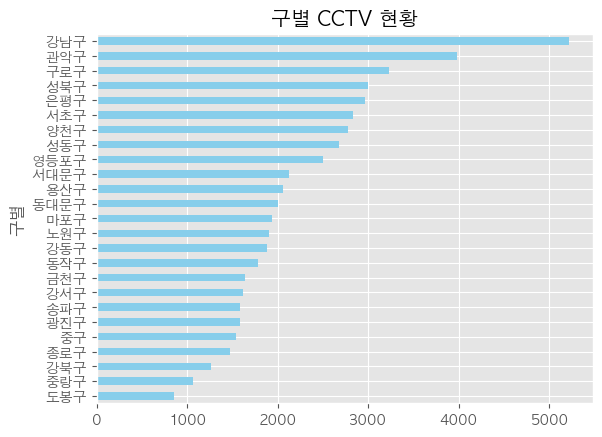

In [89]:
data_result['소계'].plot(
    kind='barh',
    title='구별 CCTV 현황',
    color='skyblue'
)
plt.show()

In [90]:
data_result['CCTV비율'] = data_result['소계']/data_result['인구수'] * 100
data_result.sort_values(by='CCTV비율',inplace=True)

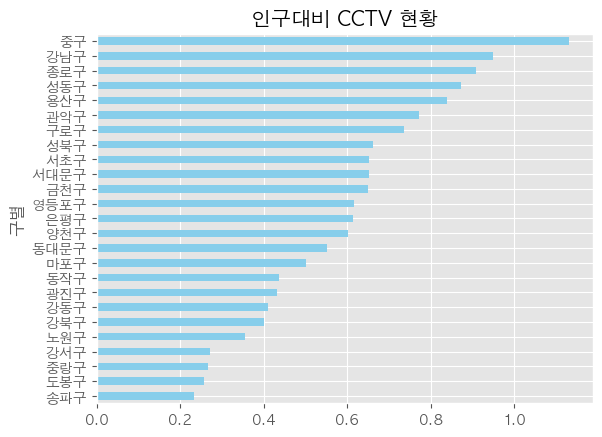

In [91]:
# plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
data_result['CCTV비율'].plot(
    kind='barh',
    title='인구대비 CCTV 현황',
    color='skyblue'
)
plt.show()

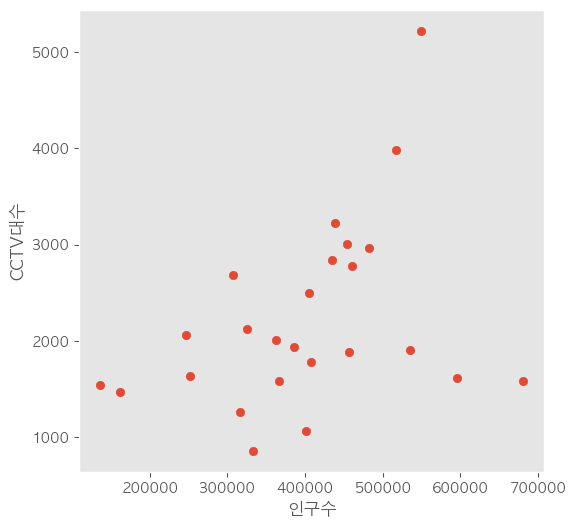

In [92]:
# 산점도를 이용한 시각화
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'],)
plt.xlabel('인구수')
plt.ylabel('CCTV대수')
plt.grid()
plt.show()

In [93]:
# 인구수, 소계에 따른 기준선 만들기
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)
fp1

array([2.88522756e-03, 1.06403852e+03])

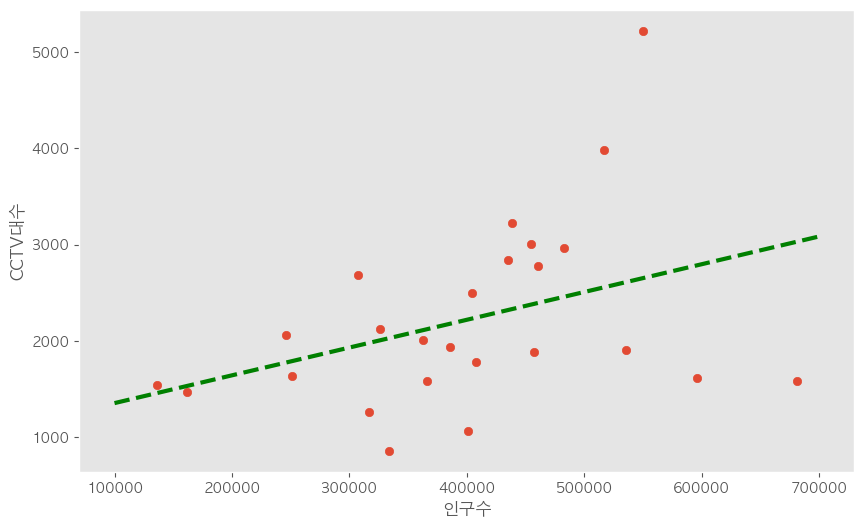

In [94]:
# y축 데이터
f1 = np.poly1d(fp1)

# x축 데이터
fx = np.linspace(100000,700000)

# 산점도를 이용한 시각화
plt.figure(figsize=(10,6))
plt.scatter(data_result['인구수'],data_result['소계'],)
plt.plot(
    fx,
    f1(fx),
    ls='dashed',
    lw=3,
    color='green'
)
plt.xlabel('인구수')
plt.ylabel('CCTV대수')
plt.grid()
plt.show()

> 기준선 (회귀선)에 근접하면 적당하게 설치되어있다

---
### 직선과의 오차를 구하는 공식과 오차가 큰 순으로 데이터 정렬 후 그래프 그리기

In [95]:
# 기준선 구하기
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)

# y축 : CCTV 기준치 구하기
f1 = np.poly1d(fp1)

# x축 : 인구수
fx = np.linspace(100000,700000)

# 소계에서 기준인구수 차이로 오차값 구하기
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
# data_result['오차'] = data_result['소계'] - f1(data_result['인구수'])

# 정렬
df_sort = data_result.sort_values('오차',ascending=False)

df_sort


,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,0.949449,2570.380612
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,0.232933,1442.540920
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,0.771297,1430.274035
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,0.257275,1168.247488
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.271444,1165.777237
중랑구,1068,22.477064,400678,395619,5059,66764,1.262610,16.662757,0.266548,1152.085731
구로구,3227,72.106667,438308,405837,32471,67432,7.408261,15.384615,0.736240,898.343155
성동구,2679,114.148681,307193,299042,8151,44728,2.653381,14.560228,0.872090,728.639767
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456,0.399369,712.934353


> 그래프에 annotate하기 위해 절댓값 사용함

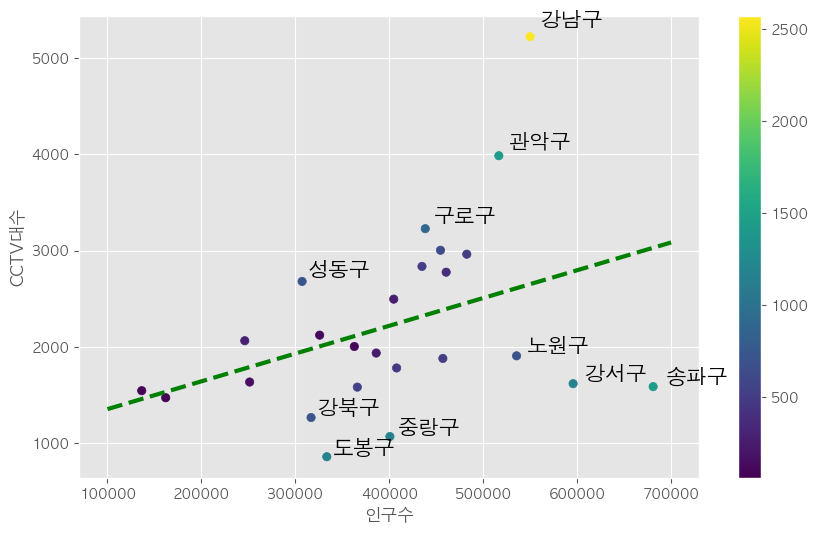

In [96]:
# 그래프에 텍스트와 color
plt.figure(figsize=(10,6))
plt.scatter(
    data_result['인구수'],
    data_result['소계'],
    c=data_result['오차']
)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='green')
# 오차가 가장 큰 10개 구에 이름 붙이기
for n in range(10):
    plt.text(
        df_sort['인구수'][n] * 1.02,
        df_sort['소계'][n] * 1.02,
        df_sort.index[n],
        fontsize=15

    )

plt.colorbar()
plt.xlabel('인구수')
plt.ylabel('CCTV대수')
plt.show()

In [97]:
data_result.to_csv("../Data/CCTV_result.csv")